In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , mean_squared_error
from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,recall_score,precision_score,roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,VotingClassifier

import warnings
warnings.simplefilter('ignore')

In [ ]:
# loading the csv data to a pandas DataFrame
heart_df = pd.read_csv('/content/Heart_Disease_Prediction.csv')
heart_df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
# Print first 5 rows of the datset.
heart_df.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [ ]:
# Print last 5 rows of the datset.
heart_df.shape

(270, 14)

In [ ]:
# Getiing details about the data
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
#checking for missing value
heart_df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [ ]:
# statistical measures about the data
heart_df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [ ]:
#converting categorical labels (strings or integers) into numerical values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
#encoder to learn the unique categories (labels) present in the 'Heart Disease'
encoder.fit(heart_df['Heart Disease'])
heart_df['Heart Disease'] = encoder.transform(heart_df['Heart Disease'])
heart_df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


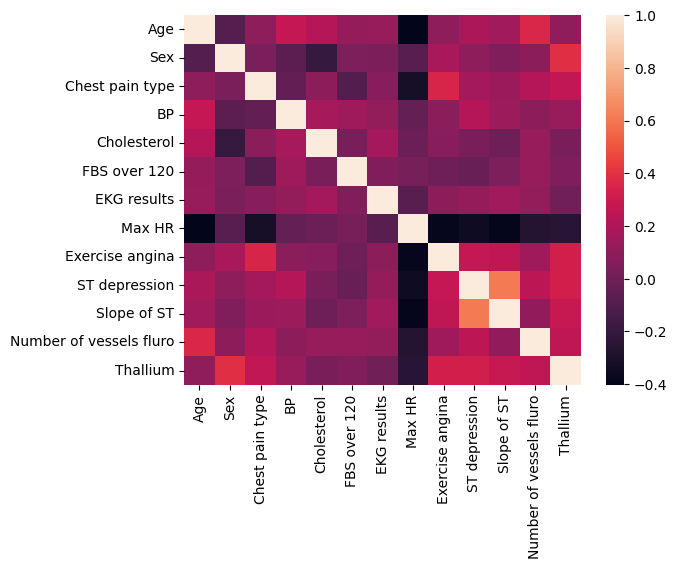

In [ ]:
#high-level interface for creating attractive and informative statistical graphics.
import seaborn as sns
#to visualize the relationship between two variables in a tabular format
sns.heatmap(heart_df.drop(columns = 'Heart Disease').corr());

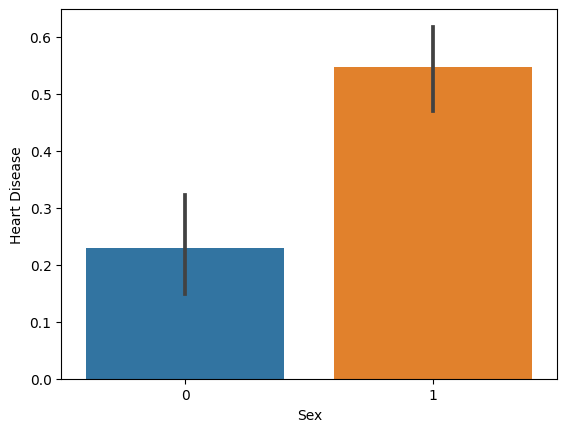

In [ ]:
sns.barplot(data= heart_df, y='Heart Disease', x='Sex');

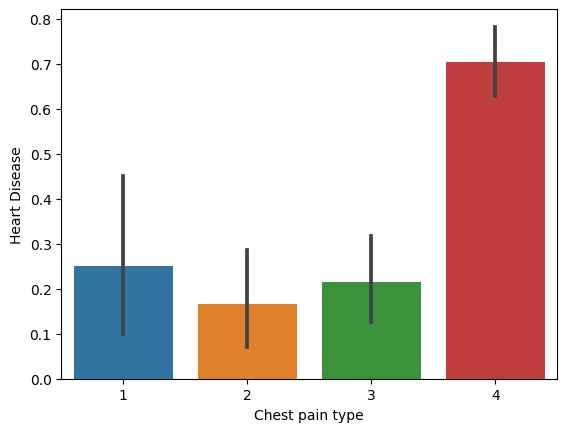

In [ ]:
sns.barplot(data =heart_df, y='Heart Disease', x='Chest pain type');

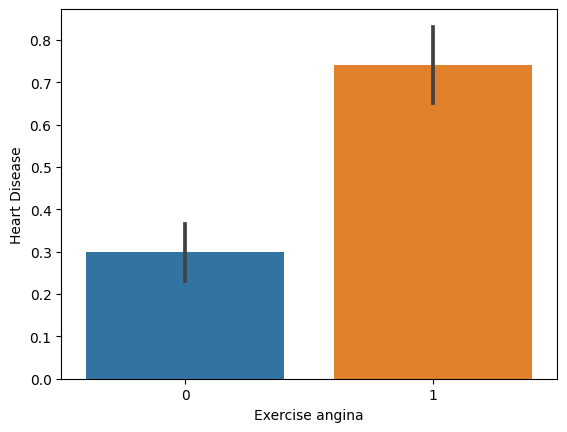

In [ ]:
sns.barplot(data =heart_df, y='Heart Disease', x='Exercise angina');

In [ ]:
heart_df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [ ]:
heart_df['Heart Disease'].value_counts()

0    150
1    120
Name: Heart Disease, dtype: int64

In [ ]:
X = heart_df.drop(columns ='Heart Disease', axis =1)
Y = heart_df['Heart Disease']
X


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state=2)
X.shape, X_train.shape, X_test.shape

((270, 13), (216, 13), (54, 13))

In [ ]:
Y.shape, Y_train.shape, Y_test.shape

((270,), (216,), (54,))

In [ ]:
model = LogisticRegression()
model

LogisticRegression()

In [ ]:
# training the LogisticREgression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on test Data:',test_data_accuracy)
#Logistic Regression
lr=LogisticRegression(solver='liblinear',penalty = 'l1')
lr.fit(X_train,Y_train)
Pred=lr.predict(X_test)
print("Accuracy Score", accuracy_score(Y_test,Pred))
print("F1 Score", f1_score(Y_test,Pred))
print("Precision Score", precision_score(Y_test,Pred))
print("Recall Score", recall_score(Y_test,Pred))




Accuracy on test Data: 0.8333333333333334
Accuracy Score 0.8333333333333334
F1 Score 0.7999999999999999
Precision Score 0.8571428571428571
Recall Score 0.75


In [ ]:
model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [ ]:
# training the DecisionTreeClassifier model with training data
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on test Data:',test_data_accuracy)
# DecisionTreeClassifier
dtc=DecisionTreeClassifier (splitter='best', max_depth=6)
dtc.fit(X_train,Y_train)
Pred=dtc.predict(X_test)
print("Accuracy Score", accuracy_score(Y_test,Pred))
print("F1 Score", f1_score(Y_test,Pred))
print("Precision Score", precision_score(Y_test,Pred))
print("Recall Score", recall_score(Y_test,Pred))


Accuracy on test Data: 0.6296296296296297
Accuracy Score 0.7407407407407407
F1 Score 0.6666666666666666
Precision Score 0.7777777777777778
Recall Score 0.5833333333333334


In [ ]:
model = RandomForestClassifier()
model

RandomForestClassifier()

In [ ]:
# training the RandomForestClassifier model with training data
model.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
# accuracy on test data

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on test Data:',test_data_accuracy)
rfc=RandomForestClassifier(n_estimators=200,max_depth=4)
rfc.fit(X_train,Y_train)
Pred=rfc.predict(X_test)
print("F1 Score", (Y_test,Pred))
print("Precision Score", precision_score(Y_test,Pred))
print("Recall Score", recall_score(Y_test,Pred))


Accuracy on test Data: 0.7592592592592593
F1 Score (213    1
264    1
211    0
76     0
187    0
125    0
40     1
248    1
60     0
93     1
114    0
55     0
49     1
128    0
104    1
127    0
122    1
202    1
25     0
91     1
138    0
116    1
134    0
83     0
79     0
10     0
46     1
68     0
190    0
263    0
48     1
195    0
124    0
231    1
20     1
182    1
247    0
39     0
17     1
87     0
222    0
66     0
175    1
102    0
94     1
235    1
110    1
89     1
173    0
14     0
160    1
233    1
188    0
162    0
Name: Heart Disease, dtype: int64, array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0]))
Precision Score 0.7777777777777778
Recall Score 0.5833333333333334


In [ ]:
# prediction
age = int(input("Enter the age:  "))
sex = int(input("Enter the no(ie. 0 or 1):  "))
cpt = int(input("Enter the cp type(1,2,3,4):  "))
bp  = int(input("Enter the bp level:  "))
chol= int(input("Enter cholestrol level:  "))
FBS = int(input("Enter the value(0 or 1):  "))
EKG = int(input("Enter the EKG results(0,1,2):  "))
HR  = int(input("Enter the HR level:  "))
EA  = int(input("Enter the value(ie. 0 or 1):  "))
ST_D= float(input("Enter ST Depression level:  "))
ST  = int(input("Enter the value(1,2,3):  "))
NVF = int(input("Enter the value(0,1,2,3):  "))
Thal= int(input("Enter the value(1 to 7):  "))
input_data_1 =(age,sex,cpt,bp,chol,FBS,EKG,HR,EA,ST_D,ST,NVF,Thal)
input_data_1_as_numpy_array = np.asarray(input_data_1)
# reshape the numpy array as we are predicting for only on instance
input_data_1_reshaped =input_data_1_as_numpy_array.reshape(1,-1)

prediction_1 = model.predict(input_data_1_reshaped)

def prediction():
      lis=[]
      lis.append(prediction_1)


      for i in range(len(lis)):
            if(lis[i] == 0):
                print("The Person does not have a Heart Disease\n")
            else:
                print("The Person has a Heart Disease\n")
prediction()

Enter the age:  58
Enter the no(ie. 0 or 1):  0
Enter the cp type(1,2,3,4):  3
Enter the bp level:  120
Enter cholestrol level:  340
Enter the value(0 or 1):  0
Enter the EKG results(0,1,2):  0
Enter the HR level:  172
Enter the value(ie. 0 or 1):  0
Enter ST Depression level:  0.0
Enter the value(1,2,3):  1
Enter the value(0,1,2,3):  0
Enter the value(1 to 7):  3
The Person does not have a Heart Disease

